# Handwritten Digit Recognition 

This notebook implements and compares two deep learning models using the **MNIST handwritten digit dataset**:

-  A **Fully Connected Neural Network (Dense)**
-  A **Convolutional Neural Network (CNN)**

We:
- Preprocess data (normalization, reshaping)
- Train & evaluate both models
- Compare their performance
- Visualize misclassifications & metrics


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix


2025-07-16 15:46:47.709759: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-16 15:46:47.712684: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-16 15:46:47.721001: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752673607.735310 1967826 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752673607.739508 1967826 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752673607.750741 1967826 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

## 1️⃣ Load & Prepare the MNIST Data

- Normalize pixel values (0–255 → 0–1)
- Reshape data for CNN input
- Convert labels to one-hot encoded vectors


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# CNN needs a 4D input: (samples, height, width, channels)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


## 2️⃣ Dense Neural Network Model

Architecture:
- `Flatten`: convert 2D image to 1D vector
- `Dense(128)`: hidden layer with 128 neurons (ReLU)
- `Dense(10)`: output layer for 10 digit classes (Softmax)


In [3]:
dense_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

dense_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

dense_history = dense_model.fit(x_train, y_train_cat,
                                epochs=5, batch_size=32,
                                validation_split=0.1)


Epoch 1/5


/files/home/part1/skumar/Bookworm/Desktop/tensorflowneuralnetworks/tf/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-07-16 15:49:08.954641: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8628 - loss: 0.4731 - val_accuracy: 0.9660 - val_loss: 0.1223
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9597 - loss: 0.1340 - val_accuracy: 0.9748 - val_loss: 0.0916
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9745 - loss: 0.0872 - val_accuracy: 0.9732 - val_loss: 0.0857
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9810 - loss: 0.0624 - val_accuracy: 0.9767 - val_loss: 0.0783
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9867 - loss: 0.0477 - val_accuracy: 0.9778 - val_loss: 0.0848


###  Dense Model: Accuracy per Epoch


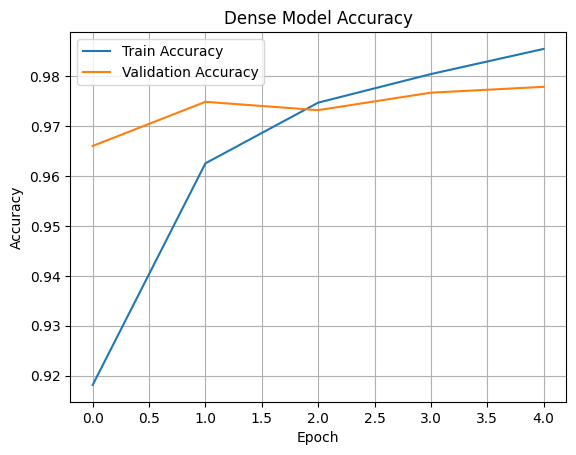

In [4]:
plt.plot(dense_history.history['accuracy'], label='Train Accuracy')
plt.plot(dense_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Dense Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


## 3️⃣ Convolutional Neural Network (CNN)

Architecture:
- `Conv2D(32)`: extract 32 feature maps using 3x3 filters
- `MaxPooling2D`: downsample using 2x2 pool
- `Dense(64)`: fully connected layer
- `Dense(10)`: output softmax layer

CNNs are better at capturing spatial patterns than dense networks.


In [5]:
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(x_train_cnn, y_train_cat,
                            epochs=5, batch_size=32,
                            validation_split=0.1)


Epoch 1/5


/files/home/part1/skumar/Bookworm/Desktop/tensorflowneuralnetworks/tf/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8929 - loss: 0.3625 - val_accuracy: 0.9830 - val_loss: 0.0653
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9806 - loss: 0.0648 - val_accuracy: 0.9840 - val_loss: 0.0563
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9869 - loss: 0.0430 - val_accuracy: 0.9835 - val_loss: 0.0567
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9905 - loss: 0.0305 - val_accuracy: 0.9873 - val_loss: 0.0438
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9942 - loss: 0.0198 - val_accuracy: 0.9853 - val_loss: 0.0522


###  CNN Model: Accuracy per Epoch


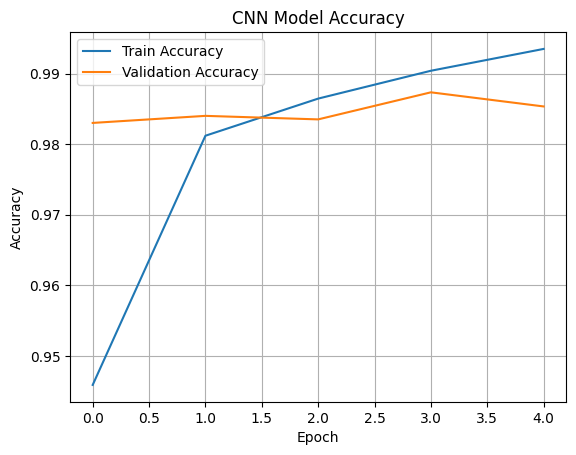

In [6]:
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


## 4️⃣ Model Evaluation on Test Data
Compare the accuracy of both models on the unseen test dataset.


In [7]:
dense_test_acc = dense_model.evaluate(x_test, y_test_cat, verbose=0)[1]
cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test_cat, verbose=0)[1]

print(f"Dense Model Accuracy: {dense_test_acc:.4f}")
print(f"CNN Model Accuracy:   {cnn_test_acc:.4f}")


Dense Model Accuracy: 0.9755
CNN Model Accuracy:   0.9824


## 5️⃣ Classification Report & Confusion Matrix (CNN)

Get detailed metrics:
- Precision, Recall, F1-score
- Confusion matrix showing actual vs. predicted digits


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report (CNN):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.95      0.97       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



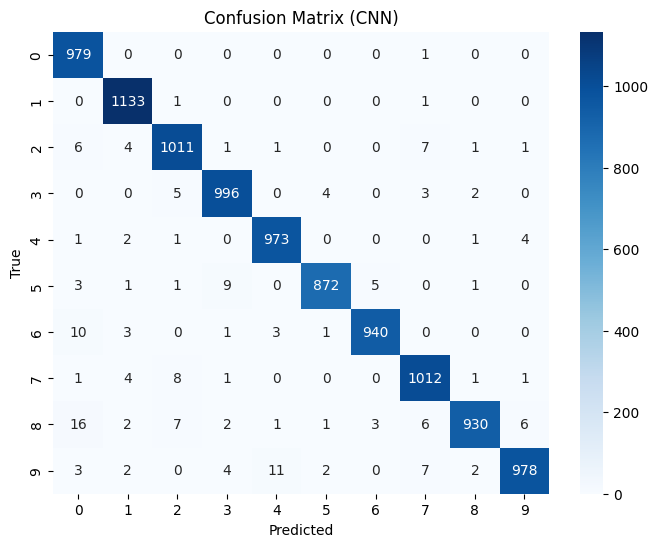

In [8]:
y_pred_cnn = np.argmax(cnn_model.predict(x_test_cnn), axis=1)

print("Classification Report (CNN):")
print(classification_report(y_test, y_pred_cnn))

conf_matrix = confusion_matrix(y_test, y_pred_cnn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix (CNN)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## 6️⃣ Visualize Misclassified Digits

Show some digits the CNN predicted incorrectly.
This helps understand edge cases.


Sample Misclassified Digits:


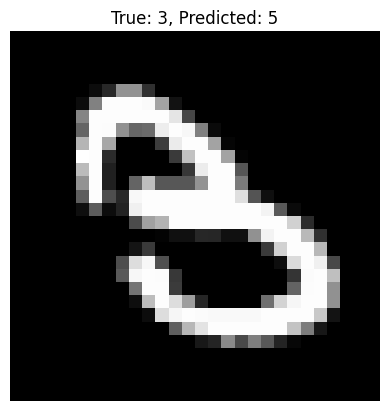

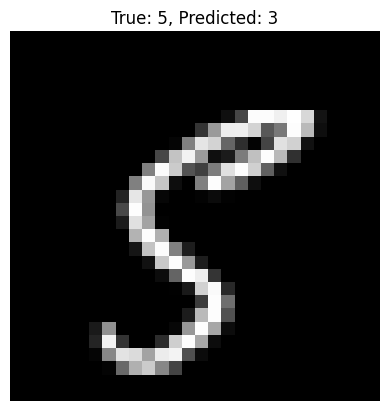

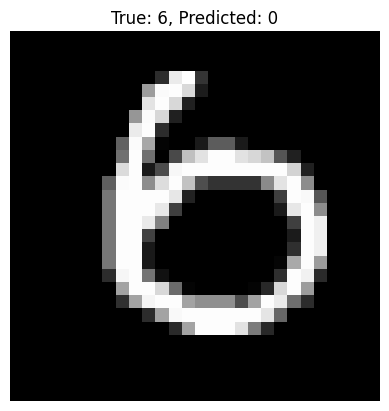

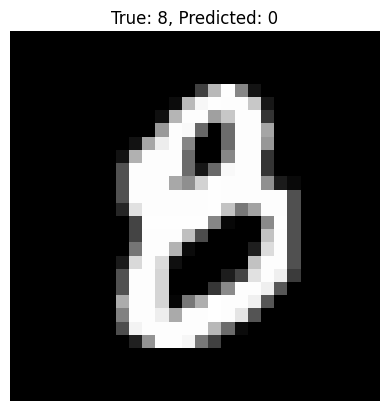

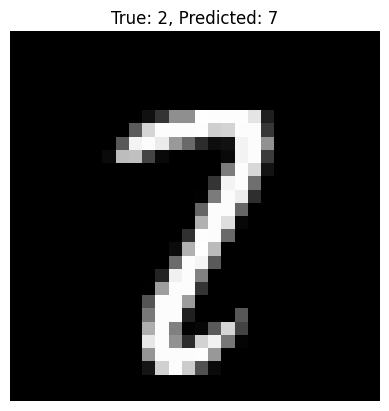

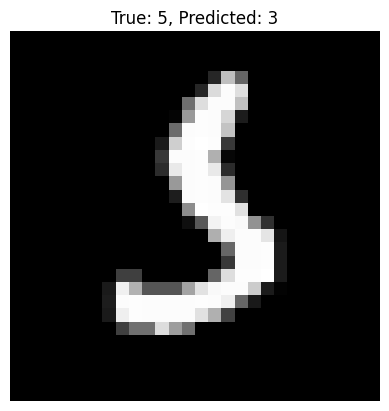

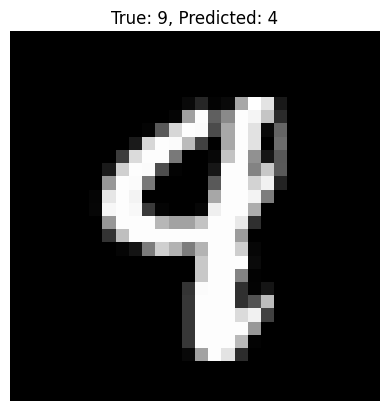

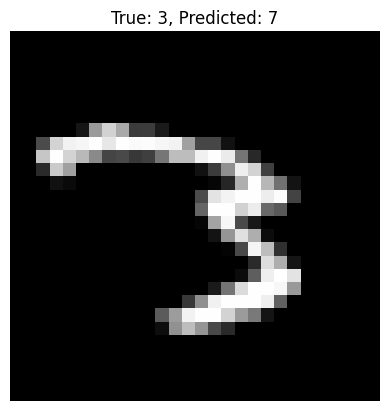

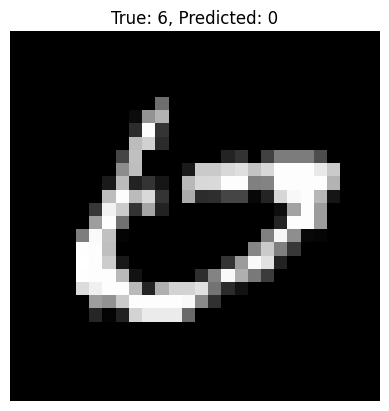

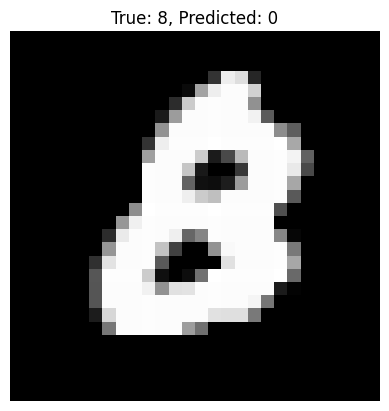

In [9]:
wrong = np.where(y_pred_cnn != y_test)[0]

print("Sample Misclassified Digits:")
for i in range(10):
    idx = wrong[i]
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True: {y_test[idx]}, Predicted: {y_pred_cnn[idx]}")
    plt.axis('off')
    plt.show()


##  Summary & Observations

- The **CNN model** outperforms the **Dense model** due to its ability to learn spatial hierarchies.
- **Validation Accuracy** shows that both models generalize well, with CNN achieving higher test accuracy.
- Misclassification is often due to overlapping shapes (e.g., 4 vs 9).
- Adding more layers, dropout, or training for more epochs could further improve performance.
